In [1]:
using PyPlot
using StatsBase

INFO: Loading help data...


In [ ]:
help(counts)

counts (generic function with 12 methods)


In [61]:
function initialise_black_jack()
    V = zeros(12, 21)
    C = zeros(12, 21)
    n = zeros(12, 21)
    return V, C, n
end

draw_a_card() = [1,10,11][int64(ceil(rand() * 3))]

function next_state(

function black_jack_episode_with_fixed_policy!(V::Matrix{Float64}, C::Matrix{Float64}, n::Matrix{Float64})
    dealers_sum    = 0
    dealer_has_ace = false
    
    players_sum    = 0
    player_has_ace = false
    
    
    dealers_card = int64(floor(rand() * 12))
    if dealers_card == 11
        dealer_has_ace = true
    end

    players_card = draw_a_card()
    if players_card == 11
        player_has_ace = true
    end

    dealers_sum = dealers_card
    players_sum = players_card
    
    println("s2: $(players_sum)")
    
    new_card = draw_a_card()
    
    if players_sum + new_card > 21 && player_has_ace == true
        players_sum = players_sum + 1
    else
        players_sum = players_sum + players_card
    end
    println("s2: $(players_sum)")
    
    s1 = dealers_sum + 1 # index 0 not allowed
    s2 = players_sum

    println(s1, " ", s2)
    
    n[s1,s2] = n[s1,s2] + 1.0
    
    
    if players_sum == 21
        new_card = draw_a_card()
        if new_card == 11 && dealers_sum + new_card > 21
            dealers_sum = dealers_sum + 1
        else
            dealers_sum = dealers_sum + players_card
        end
        if dealers_sum == 21
            # C[s1,s2] = C[s1,s2] + 0.0 # draw game
            V[s1,s2] = C[s1,s2] / n[s1,s2]
            return 0
        end
    end        
    
    while players_sum < 20
        new_card = draw_a_card()
        if new_card == 11 && players_sum + new_card > 21
            players_sum = players_sum + 1
        else
            players_sum = players_sum + players_card
        end
    end
    
    if players_sum > 21
        C[s1,s2] = C[s1,s2] - 1.0 # lost
        V[s1,s2] = C[s1,s2] / n[s1,s2]
        return
    end
    
    while dealers_sum < 17
        new_card = draw_a_card()
        if new_card == 11 && dealers_sum + new_card > 21
            dealers_sum = dealers_sum + 1
        else
            dealers_sum = dealers_sum + players_card
        end
    end
    
    if dealers_sum > 21 || dealers_sum < players_sum
        C[s1,s2] = C[s1,s2] + 1.0 # win
        V[s1,s2] = C[s1,s2] / n[s1,s2]
        return
    end
    
    # loss    
    C[s1,s2] = C[s1,s2] - 1.0 # win
    V[s1,s2] = C[s1,s2] / n[s1,s2]

end

black_jack_episode_with_fixed_policy! (generic function with 1 method)

In [62]:
test = [draw_a_card() for i = 1:1000];
counts(test,1:11)

11-element Array{Int64,1}:
 328
   0
   0
   0
   0
   0
   0
   0
   0
 357
 315

In [63]:
V, C, n = initialise_black_jack();

In [64]:
for i=1:1000
    black_jack_episode_with_fixed_policy!(V,C,n)
end

s2: 11
s2: 12
9 12
s2: 11
s2: 22
4 22


LoadError: BoundsError()
while loading In[64], in expression starting on line 1

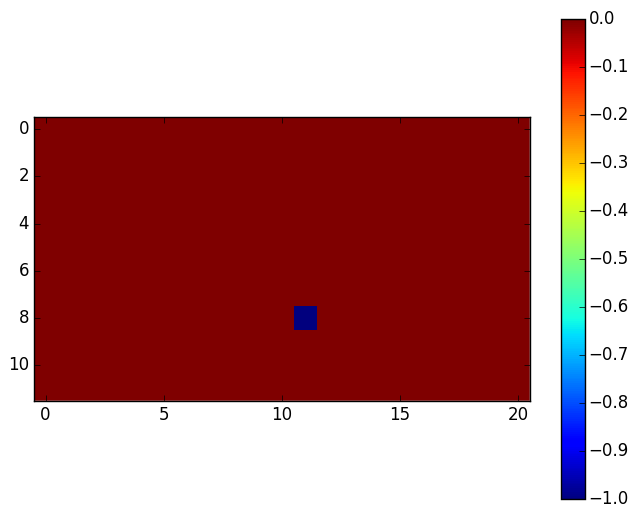

PyObject <matplotlib.colorbar.Colorbar instance at 0x1214e6050>

In [65]:
colorbar(imshow(V, interpolation="none"))